<a href="https://colab.research.google.com/github/marinalgarcia/Grupo_2_DatosVivos_TP5/blob/main/TP_5_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📍 Objetivo
Resolver la prueba técnica para el puesto de Data Analyst de la startup [ifood](https://www.ifood.com.br/) de Brasil.
<br>Esta startup se dedica al servicio de delivery de comida similar a Pedidos Ya, Rappi y Uber Eats.

## 📍 Contexto

La empresa
Considere una empresa bien establecida que opera en el sector minorista de alimentos. Actualmente tienen alrededor varios cientos de miles de clientes registrados y sirven a casi un millón de consumidores al año. Venden productos de 5 categorías principales: vinos, productos cárnicos raros, frutas exóticas, especialmente Pescados preparados y productos dulces. Estos se pueden dividir en productos premium y productos regulares.

Los clientes pueden ordenar y adquirir productos a través de 3 canales de venta: tiendas físicas, catálogos y el sitio web de la empresa. A nivel mundial, la compañía tuvo ingresos sólidos y un resultado final saludable en el últimos 3 años, pero las perspectivas de crecimiento de ganancias para los próximos 3 años no son prometedoras ...

Por esta razón, se están considerando varias iniciativas estratégicas para revertir esta situación. Una es mejorar la realización de actividades de marketing, con un enfoque especial en las campañas de marketing.

### El Departamento de Marketing

El departamento de marketing fue presionado para gastar su presupuesto anual de manera más inteligente. La CMO
percibe la importancia de tener un enfoque más cuantitativo a la hora de tomar decisiones, por lo que **se contrató a un pequeño equipo de científicos de datos con un objetivo claro en mente: construir una solución que apoye las iniciativas de marketing directo.**
<br>Deseablemente, el éxito de estas actividades demostrará el área de oportunidad y también deberan convencer a los más escépticos dentro de la empresa.

### El objetivo del equipo

Es construir un análisis para abordar el mayor beneficio para la próxima campaña de marketing, programada para el próximo mes. La nueva campaña, la sexta, tiene como objetivo vender a una NUEVA base de datos de clientes.

**Para construir el análisis, se desarrolló una campaña piloto que involucró 2.240 clientes. Los clientes fueron seleccionados al azar y contactados por teléfono con respecto a la adquisición del gadget. Durante los meses siguientes, los clientes que compraron la oferta fueron debidamente etiquetados.**

El coste total de la campaña de muestra fue de 6.720MU y los ingresos generado por los clientes que aceptaron la oferta fue de 3.674MU. A nivel mundial, la campaña tuvo un beneficio de -3.046MU. La tasa de éxito de la campaña fue del 15%.


## 📍 Consideraciones

- Creen un modelo de clasificación utilizando Random Forest para la columna `Response`.
- Guarden el modelo de clasificación Random forest como `rfc.pkl`.
- Creen un modelo con regresión lineal y con Random Forest + GridsearchCV para predecir la columna `Income`.
- Guardar ambos modelos de regresion en pkl `lr.pkl` y `rfr.pkl`
- Cargar proyecto en Github / Gitlab, usen git y git-lfs para los `.csv` y `.pkl`.

## 1) Cargamos los datos!

In [ ]:
#HABILITO IMPORTACION DESDE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
#!pip install funpymodeling
from funpymodeling.exploratory import status, freq_tbl

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BOOTCAMP - GERIES 4/TP5/jueves_tarea__dataset/marketing_campaign.csv', sep = ';')
df.head(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0


## 2) Preparación de la data

In [ ]:
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,ID,0,0.000000,1,0.000446,2240,int64
1,Year_Birth,0,0.000000,0,0.000000,59,int64
2,Education,0,0.000000,0,0.000000,5,object
3,Marital_Status,0,0.000000,0,0.000000,8,object
4,Income,24,0.010714,0,0.000000,1974,float64
5,Kidhome,0,0.000000,1293,0.577232,3,int64
6,Teenhome,0,0.000000,1158,0.516964,3,int64
7,Dt_Customer,0,0.000000,0,0.000000,663,object
8,Recency,0,0.000000,28,0.012500,100,int64
9,MntWines,0,0.000000,13,0.005804,776,int64


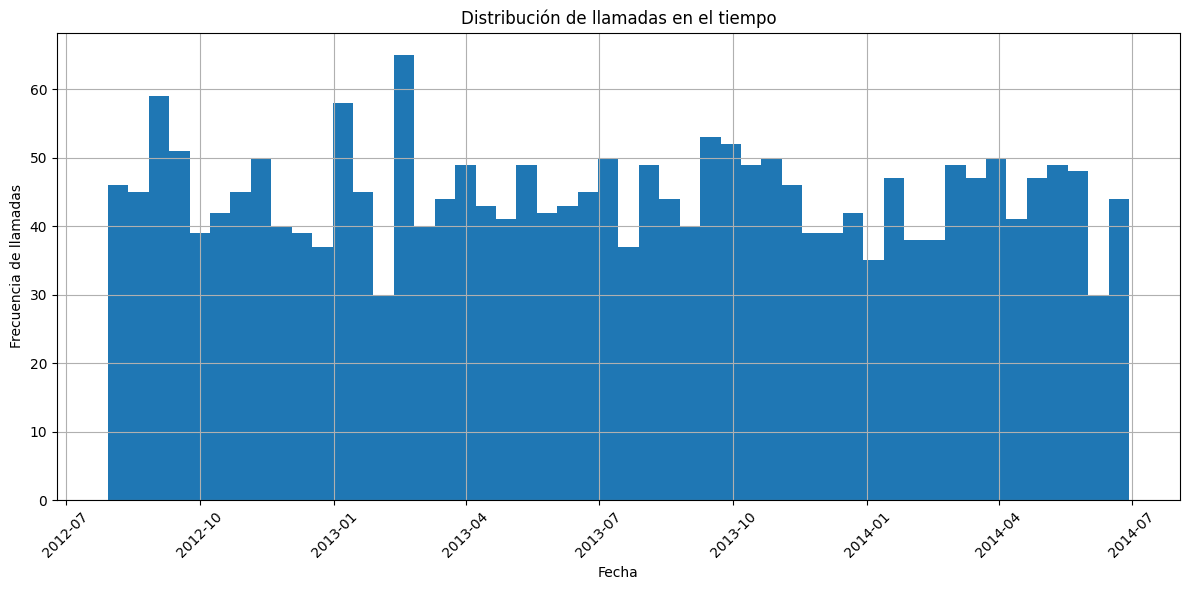

In [ ]:
#Esta columna la discretizamos o la eliminamos?
#df['Dt_Customer'].unique()
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convertir a datetime si no lo está
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Gráfico de distribución temporal
plt.figure(figsize=(12, 6))
df['Dt_Customer'].hist(bins=50)
plt.title('Distribución de llamadas en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia de llamadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

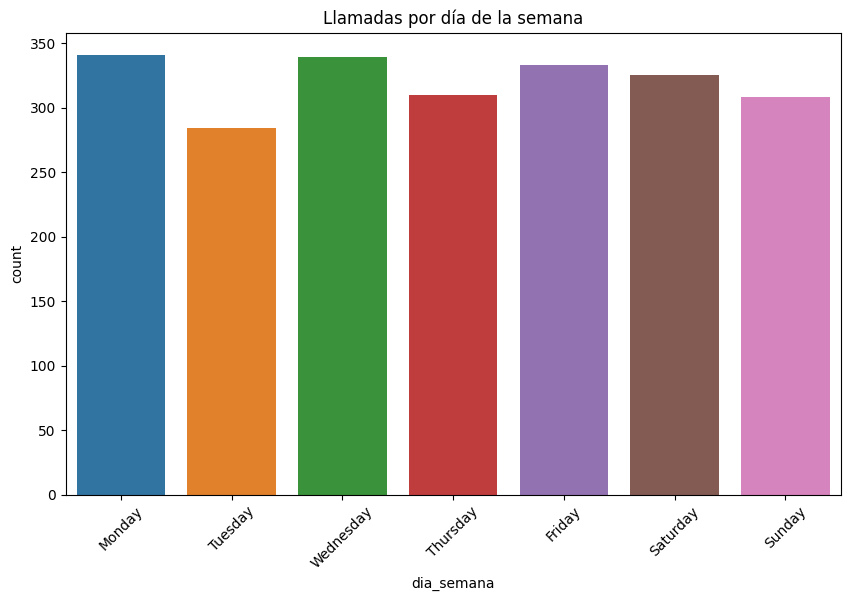

In [ ]:
# Extraer día de la semana
df['dia_semana'] = df['Dt_Customer'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dia_semana',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Llamadas por día de la semana')
plt.xticks(rotation=45)
plt.show()

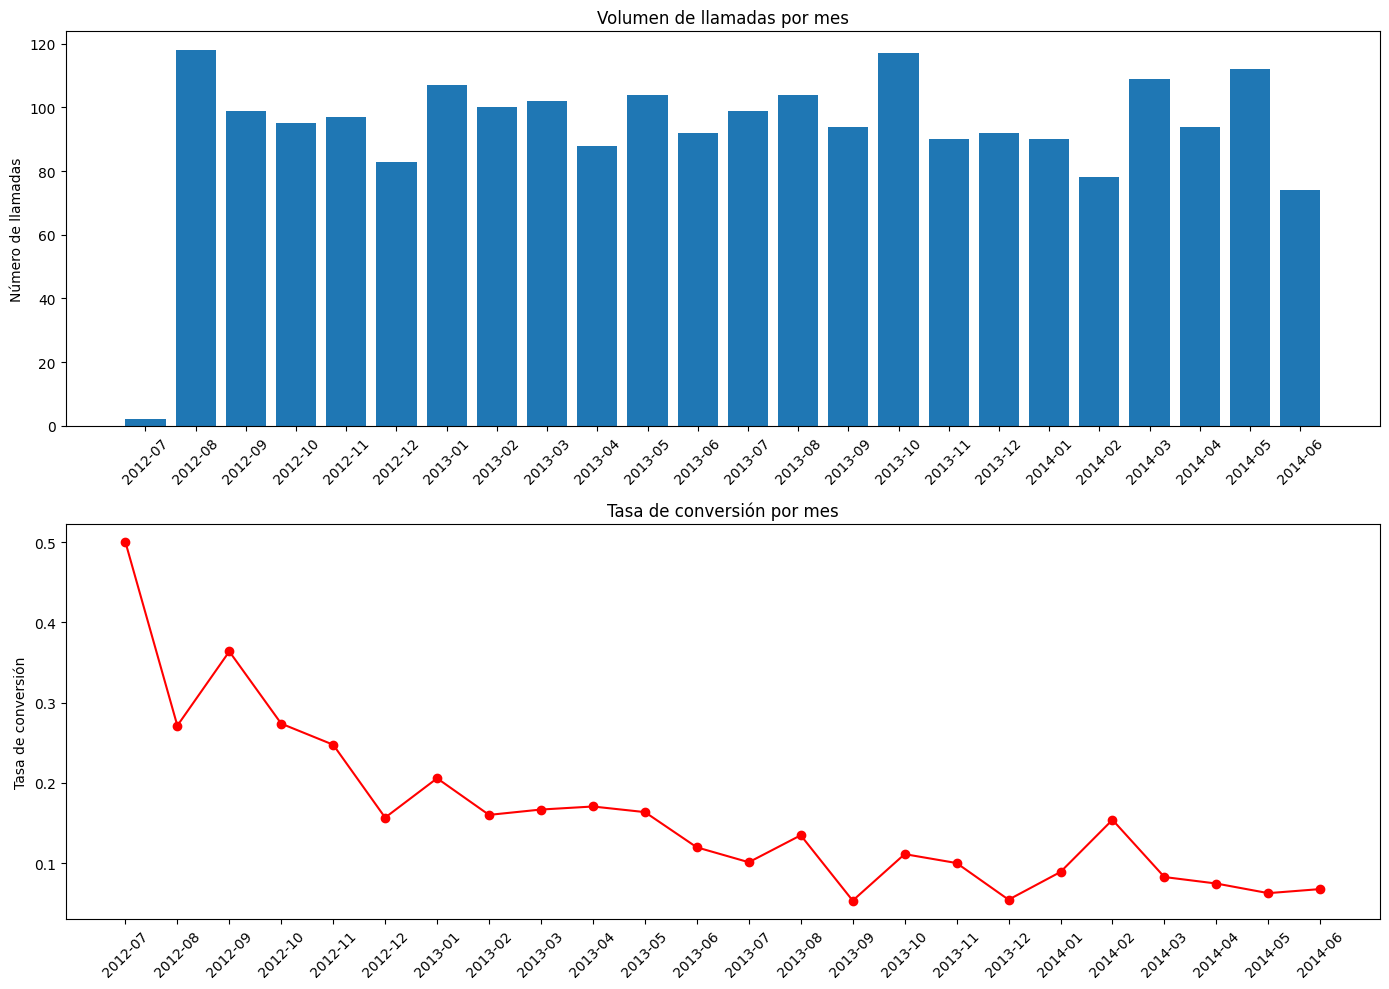

In [ ]:
df['mes_año'] = df['Dt_Customer'].dt.to_period('M')

# Calcular tasa de conversión por mes
conversion_mensual = df.groupby('mes_año')['Response'].agg(['count', 'mean']).reset_index()
conversion_mensual.columns = ['mes_año', 'total_llamadas', 'tasa_conversion']

# Gráfico dual: volumen y tasa de conversión
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Volumen de llamadas
ax1.bar(conversion_mensual['mes_año'].astype(str), conversion_mensual['total_llamadas'])
ax1.set_title('Volumen de llamadas por mes')
ax1.set_ylabel('Número de llamadas')
ax1.tick_params(axis='x', rotation=45)

# Tasa de conversión
ax2.plot(conversion_mensual['mes_año'].astype(str), conversion_mensual['tasa_conversion'], marker='o', color='red')
ax2.set_title('Tasa de conversión por mes')
ax2.set_ylabel('Tasa de conversión')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Discretizamos:
# Extraer características clave
df['año'] = df['Dt_Customer'].dt.year
df['mes'] = df['Dt_Customer'].dt.month
df['dia_semana'] = df['Dt_Customer'].dt.dayofweek  # 0=Lunes, 6=Domingo
df['trimestre'] = df['Dt_Customer'].dt.quarter
df['es_fin_semana'] = (df['Dt_Customer'].dt.dayofweek >= 5).astype(int)

In [ ]:
# Saco variable con formato fecha que Sckit no lo toma:
df=df.drop(['mes_año', 'Dt_Customer'], axis=1)

In [ ]:
# Elimino 2 columnas que solo tienen 1 valor
print(f'{df['Z_CostContact'].unique()}')
print(f'{df['Z_Revenue'].unique()}')

[3]
[11]


In [ ]:
# Elimino la variable ID que tampoco suma para el modelo:
df=df.drop(['ID',	'Z_Revenue', 'Z_CostContact'], axis=1)

In [ ]:
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Year_Birth,0,0.000000,0,0.000000,59,int64
1,Education,0,0.000000,0,0.000000,5,object
2,Marital_Status,0,0.000000,0,0.000000,8,object
3,Income,24,0.010714,0,0.000000,1974,float64
4,Kidhome,0,0.000000,1293,0.577232,3,int64
5,Teenhome,0,0.000000,1158,0.516964,3,int64
6,Recency,0,0.000000,28,0.012500,100,int64
7,MntWines,0,0.000000,13,0.005804,776,int64
8,MntFruits,0,0.000000,400,0.178571,158,int64
9,MntMeatProducts,0,0.000000,1,0.000446,558,int64


In [ ]:
#Esta la pasamos a dummie
print(f'{df['Education'].unique()}')
print(f'{df['Marital_Status'].unique()}')

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [ ]:
df1 = pd.get_dummies(df)

In [ ]:
status(df1)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Year_Birth,0,0.000000,0,0.000000,59,int64
1,Income,24,0.010714,0,0.000000,1974,float64
2,Kidhome,0,0.000000,1293,0.577232,3,int64
3,Teenhome,0,0.000000,1158,0.516964,3,int64
4,Recency,0,0.000000,28,0.012500,100,int64
5,MntWines,0,0.000000,13,0.005804,776,int64
6,MntFruits,0,0.000000,400,0.178571,158,int64
7,MntMeatProducts,0,0.000000,1,0.000446,558,int64
8,MntFishProducts,0,0.000000,384,0.171429,182,int64
9,MntSweetProducts,0,0.000000,419,0.187054,177,int64


## 3) Clasificación

### 3.1) Separación de X de Y, y luego TR de TS (rutina):

In [ ]:
data_x = df1.drop('Response', axis=1)
data_y = df1['Response']

In [ ]:
data_x = data_x.values
data_y = data_y.values

⏰ Acá faltaba random_state

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y,random_state=42, test_size=0.3)

### 3.2) Creación del modelo predictivo

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creamos 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

### 3.3) Predicción de la clase y score

In [ ]:
rf.predict(x_train)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
pred_probs=rf.predict_proba(x_train)

In [ ]:
pred_probs

array([[0.9885    , 0.0115    ],
       [0.9195    , 0.0805    ],
       [0.18175   , 0.81825   ],
       ...,
       [0.95546667, 0.04453333],
       [0.998     , 0.002     ],
       [0.99      , 0.01      ]])

In [ ]:
y_prob_tr=pred_probs[:,1]

In [ ]:
y_prob_tr

array([0.0115    , 0.0805    , 0.81825   , ..., 0.04453333, 0.002     ,
       0.01      ])

#### Guardo en Pickle el modelo que hicimos:
- Guarden el modelo de clasificación Random forest como `rfc.pkl`.

In [ ]:
import pickle

In [ ]:
# Guardar en el disco
filename = 'rfc.pkl'
pickle.dump(rf, open(filename, 'wb')) # rfc = nuestro modelo

In [ ]:
# Lo cargamos para usarlo en otro momento.
rf_loaded = pickle.load(open(filename, 'rb'))

### 3.4) Matriz de confusión

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

#### A) VALORES ABSOLUTOS

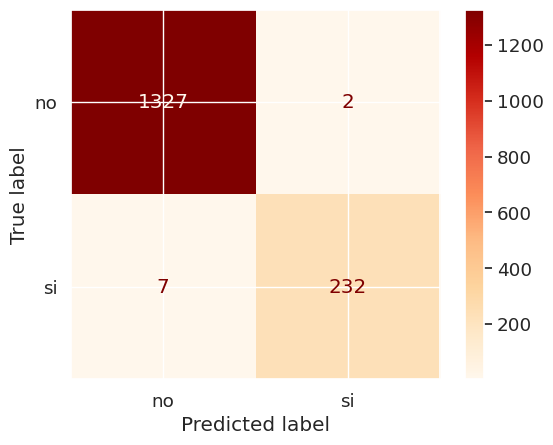

In [ ]:
sns.set_theme(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['no','si'],
    cmap='OrRd',
    )

#### B) NORMALIZANDO

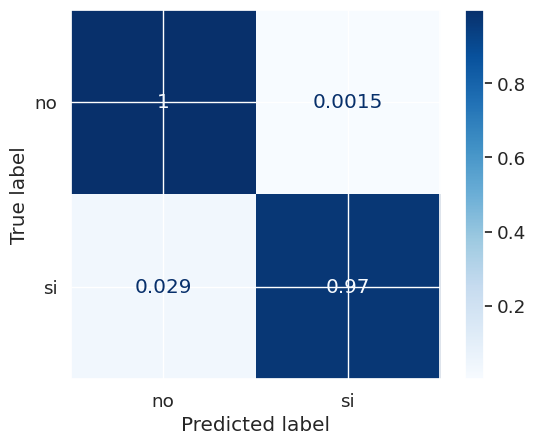

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['no','si'],
    cmap='Blues',
    normalize='true',
    )

#### c) No permite variar el punto de corte, entonces:

In [ ]:
y_pred1=rf.predict(x_train)

conf_mat1=pd.crosstab(index=y_train,    # filas = valor real
                     columns=y_pred1,   # columnas = valor predicho
                     rownames=['Actual'],
                     colnames=['Pred'],
                     normalize='index')

print(conf_mat1)

Pred           0         1
Actual                    
0       0.998495  0.001505
1       0.029289  0.970711


In [ ]:
pd.crosstab(index=y_train,    # filas = valor real
                     columns=y_pred1,   # columnas = valor predicho
                     rownames=['Actual'],
                     colnames=['Pred'],
                     normalize= True)

Pred,0,1
Actual,,
0,0.846301,0.001276
1,0.004464,0.147959


#### d) Seteo del punto de corte

In [ ]:
y_prob_tr

array([0.0115    , 0.0805    , 0.81825   , ..., 0.04453333, 0.002     ,
       0.01      ])

#### e) ¡Importante! Elección de un punto de corte

La primer opción es un punto que sea mayor al promedio.
Lo seteo y luego creo el label.

In [ ]:
y_prob_tr.mean()

0.15442796215618282

In [ ]:
import numpy as np

# Reemplazo el punto de corte con el promedio obtenido
y_pred2=np.where(y_prob_tr > 0.15, "si", "no")

In [ ]:
y_pred2

array(['no', 'no', 'si', ..., 'no', 'no', 'no'], dtype='<U2')

#### f) Matriz de confusión (punto de corte custom)

In [ ]:
conf_mat2=pd.crosstab(index=y_train,
                      columns=y_pred2,      # ¡cambio!
                      rownames=['Actual'],
                      colnames=['Pred'],
                      normalize='index')

print(conf_mat2)

Pred          no        si
Actual                    
0       0.957111  0.042889
1       0.000000  1.000000


####Comparando antes y después:

In [ ]:
import matplotlib.pyplot as plt

print("### Matriz Predicciones corte 0.5 (default)")
print(conf_mat1)

print("-"*40)
print("### Matriz Predicciones corte 0.15 ")
print(conf_mat2)

### Matriz Predicciones corte 0.5 (default)
Pred           0         1
Actual                    
0       0.998495  0.001505
1       0.029289  0.970711
----------------------------------------
### Matriz Predicciones corte 0.15 
Pred          no        si
Actual                    
0       0.957111  0.042889
1       0.000000  1.000000


Corte 0.5 (default): equilibrio, buena precisión y buen recall, pero deja escapar algunos positivos.

Corte 0.15: máxima sensibilidad (recall), asegura encontrar todos los positivos, pero aumenta los falsos positivos.

Nos convendria usar el corte más alto porque al tratarse de una campaña de marketing (aumenta el costo por altos errores), nos conviene minimizar los falsos positivos, es decir que respondio la llamada si no la respondio.


⏰ **VER MÁS ABAJO** :

#### g) Análisis de los distintos puntos de corte

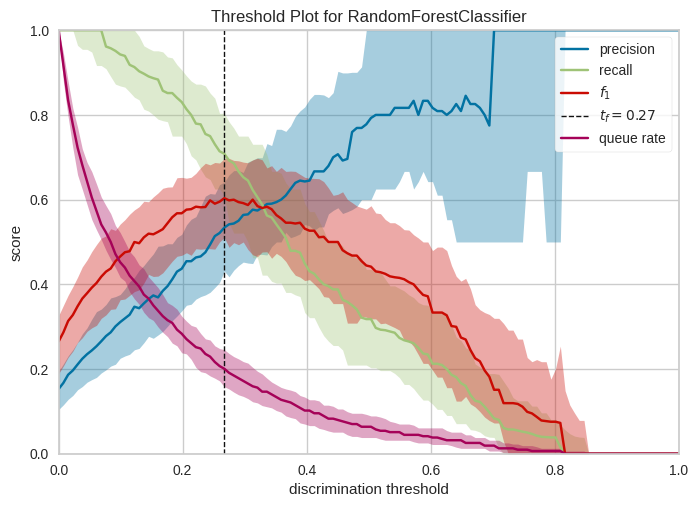

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [ ]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(rf)

visualizer.fit(x_train, y_train)        # Ajustar data al visualizador
visualizer.show()                       # Mostrar figura

En función a lo que muestra el Threshold Plot for RandomForestClassifier el mejor punte de corte es 0,27. Lo probamos a continuación.

In [ ]:
from sklearn.metrics import classification_report

# Comparar ambos thresholds
y_pred_027 = np.where(y_prob_tr > 0.27, 1, 0)

conf_mat3=pd.crosstab(index=y_train,
                      columns=y_pred_027,      # ¡cambio!
                      rownames=['Actual'],
                      colnames=['Pred'],
                      normalize='index')

print(conf_mat3)

Pred           0         1
Actual                    
0       0.991723  0.008277
1       0.000000  1.000000


⏰ ACÁ AGREGUÉ LA COMPARACIÓN CON EL CORTE ÓPTIMO SEGÚN GRÁFICO PREVIO

In [ ]:
print("### Matriz Predicciones corte 0.5 (default)")
print(conf_mat1)

print("-"*40)
print("### Matriz Predicciones corte 0.15 ")
print(conf_mat2)

print("-"*40)
print("### Matriz Predicciones corte 0.27 ")
print(conf_mat3)

### Matriz Predicciones corte 0.5 (default)
Pred           0         1
Actual                    
0       0.998495  0.001505
1       0.029289  0.970711
----------------------------------------
### Matriz Predicciones corte 0.15 
Pred          no        si
Actual                    
0       0.957111  0.042889
1       0.000000  1.000000
----------------------------------------
### Matriz Predicciones corte 0.27 
Pred           0         1
Actual                    
0       0.991723  0.008277
1       0.000000  1.000000


Corte 0.5 (default): equilibrio, buena precisión y buen recall, pero deja escapar algunos positivos.

Corte 0.15: máxima sensibilidad (recall), asegura encontrar todos los positivos, pero aumenta los falsos positivos.

Corte 0.27: máxima sensibilidad (recall), asegura encontrar todos los positivos y disminuye los falsos positivos respecto del corte anterior (del 4% baja a menos del 1%).

Si bien por ser una campaña de marketing (aumenta el costo por altos errores), nos conviene minimizar los falsos positivos, es decir que respondio la llamada si no la respondio, el % es poco relevante (menos del 1%). Por lo que iría por el corte óptimo del 0,27.

#### h) Curva ROC

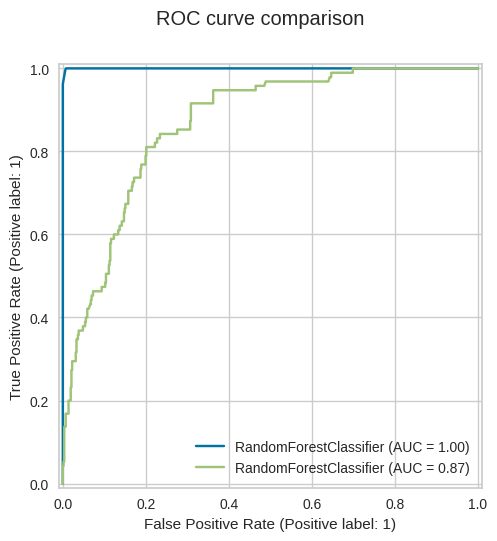

In [ ]:
from sklearn.metrics import RocCurveDisplay

tr_disp = RocCurveDisplay.from_estimator(rf, x_train, y_train)
ts_disp = RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

La linea azul, muestra que el modelo clasifica casi perfecto en la parte de entrenamiento. AUC=1, es una señal de ajuste perfecto o señal de sobreajuste (overfitting), que es casi imposible. La linea naranja es la del test,el AUC es 0.87, si bien es muy bueno dista bastante del de entrenamiento; lo que indica que el modelo aprendió muy bien los datos de entrenamiento, pero pierde algo de capacidad al generalizar.

Conclusiones

El modelo diferencia muy bien entre clases (AUC=0.87 en test es alto).

El AUC=1 en train sugiere que el Random Forest está muy ajustado al entrenamiento → posible sobreajuste.

Para verificarlo:

Se revisa la importancia de variables → ver si algunas dominan.

Ajustar hiperparámetros (max_depth, min_samples_split, n_estimators).

Usar validación cruzada (cross_val_score) para tener una estimación más robusta del rendimiento.

Acá solamente ajustamos hiperparámetros.

#### i) Tratamos de ajustar los hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definimos el grid de hiperparámetros a probar
param_grid = {
    'n_estimators': [200, 500, 1000],      # cantidad de árboles
    'max_depth': [None, 5, 10, 20],        # profundidad máxima
    #'min_samples_split': [2, 5, 10],       # mínimo de muestras para dividir un nodo
    #'min_samples_leaf': [1, 2, 4],         # mínimo de muestras en una hoja
    #'max_features': ['sqrt', 'log2']       # número de features consideradas en cada split
}

# Creamos el modelo base
rf_base = RandomForestClassifier(random_state=42)

In [ ]:
# GridSearchCV con validación cruzada (5-fold)
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='roc_auc',   # usamos AUC como métrica
    cv=3,
    verbose=2
)

In [ ]:
# Ajustamos el grid a los datos de entrenamiento
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.7s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.7s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.7s
[CV] END ...................max_depth=None, n_estimators=500; total time=   1.7s
[CV] END ...................max_depth=None, n_estimators=500; total time=   2.3s
[CV] END ...................max_depth=None, n_estimators=500; total time=   2.5s
[CV] END ..................max_depth=None, n_estimators=1000; total time=   3.4s
[CV] END ..................max_depth=None, n_estimators=1000; total time=   3.4s
[CV] END ..................max_depth=None, n_estimators=1000; total time=   3.7s
[CV] END ......................max_depth=5, n_estimators=200; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=200; total time=   0.8s
[CV] END ......................max_depth=5, n_es

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'n_estimators': [200, 500, 1000]},
             scoring='roc_auc', verbose=2)

In [ ]:
# Mejor modelo encontrado
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor AUC en CV:", grid_search.best_score_)

Mejores hiperparámetros: {'max_depth': None, 'n_estimators': 500}
Mejor AUC en CV: 0.8897255479041061


⏰ acá si aplicaríamos el mejor threshold!

In [ ]:
# Reentrenamos el mejor modelo en train y evaluamos en test
best_rf = grid_search.best_estimator_
from sklearn.metrics import roc_auc_score

y_pred_proba = best_rf.predict_proba(x_test)[:, 1]  # ← Probabilidades puras
print("AUC en test con mejor modelo:", roc_auc_score(y_test, y_pred_proba))

# Y después aplicas el threshold para decisiones:
y_pred_final = (y_pred_proba > 0.27).astype(int)

AUC en test con mejor modelo: 0.8616984402079724


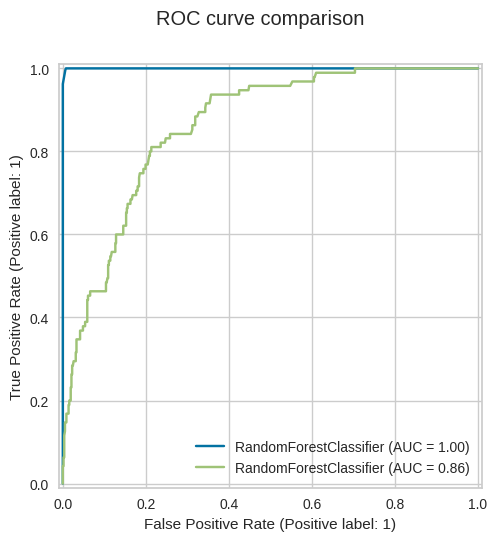

In [ ]:
from sklearn.metrics import RocCurveDisplay

tr_disp = RocCurveDisplay.from_estimator(best_rf, x_train, y_train)
ts_disp = RocCurveDisplay.from_estimator(best_rf, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

## 4) Regresión

**CONSIGNA:** Creen un modelo con regresión lineal y con Random Forest + GridsearchCV para predecir la columna `Income`.

#### 4.1) Análisis exploratorio de datos (AED)

In [ ]:
status(df1)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Year_Birth,0,0.000000,0,0.000000,59,int64
1,Income,24,0.010714,0,0.000000,1974,float64
2,Kidhome,0,0.000000,1293,0.577232,3,int64
3,Teenhome,0,0.000000,1158,0.516964,3,int64
4,Recency,0,0.000000,28,0.012500,100,int64
5,MntWines,0,0.000000,13,0.005804,776,int64
6,MntFruits,0,0.000000,400,0.178571,158,int64
7,MntMeatProducts,0,0.000000,1,0.000446,558,int64
8,MntFishProducts,0,0.000000,384,0.171429,182,int64
9,MntSweetProducts,0,0.000000,419,0.187054,177,int64


Vamos a eliminar los nan de nuestra variable objetivo (income) porque representan el 1% de los datos.

In [ ]:
# Eliminar filas que contengan NaN
df1 = df1.dropna(subset=['Income'])

/tmp/ipython-input-2927364384.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df1.hist(ax = fig.gca())


array([[<Axes: title={'center': 'Year_Birth'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Kidhome'}>,
        <Axes: title={'center': 'Teenhome'}>,
        <Axes: title={'center': 'Recency'}>],
       [<Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>,
        <Axes: title={'center': 'MntMeatProducts'}>,
        <Axes: title={'center': 'MntFishProducts'}>,
        <Axes: title={'center': 'MntSweetProducts'}>],
       [<Axes: title={'center': 'MntGoldProds'}>,
        <Axes: title={'center': 'NumDealsPurchases'}>,
        <Axes: title={'center': 'NumWebPurchases'}>,
        <Axes: title={'center': 'NumCatalogPurchases'}>,
        <Axes: title={'center': 'NumStorePurchases'}>],
       [<Axes: title={'center': 'NumWebVisitsMonth'}>,
        <Axes: title={'center': 'AcceptedCmp3'}>,
        <Axes: title={'center': 'AcceptedCmp4'}>,
        <Axes: title={'center': 'AcceptedCmp5'}>,
        <Axes: title={'center': 'Accepted

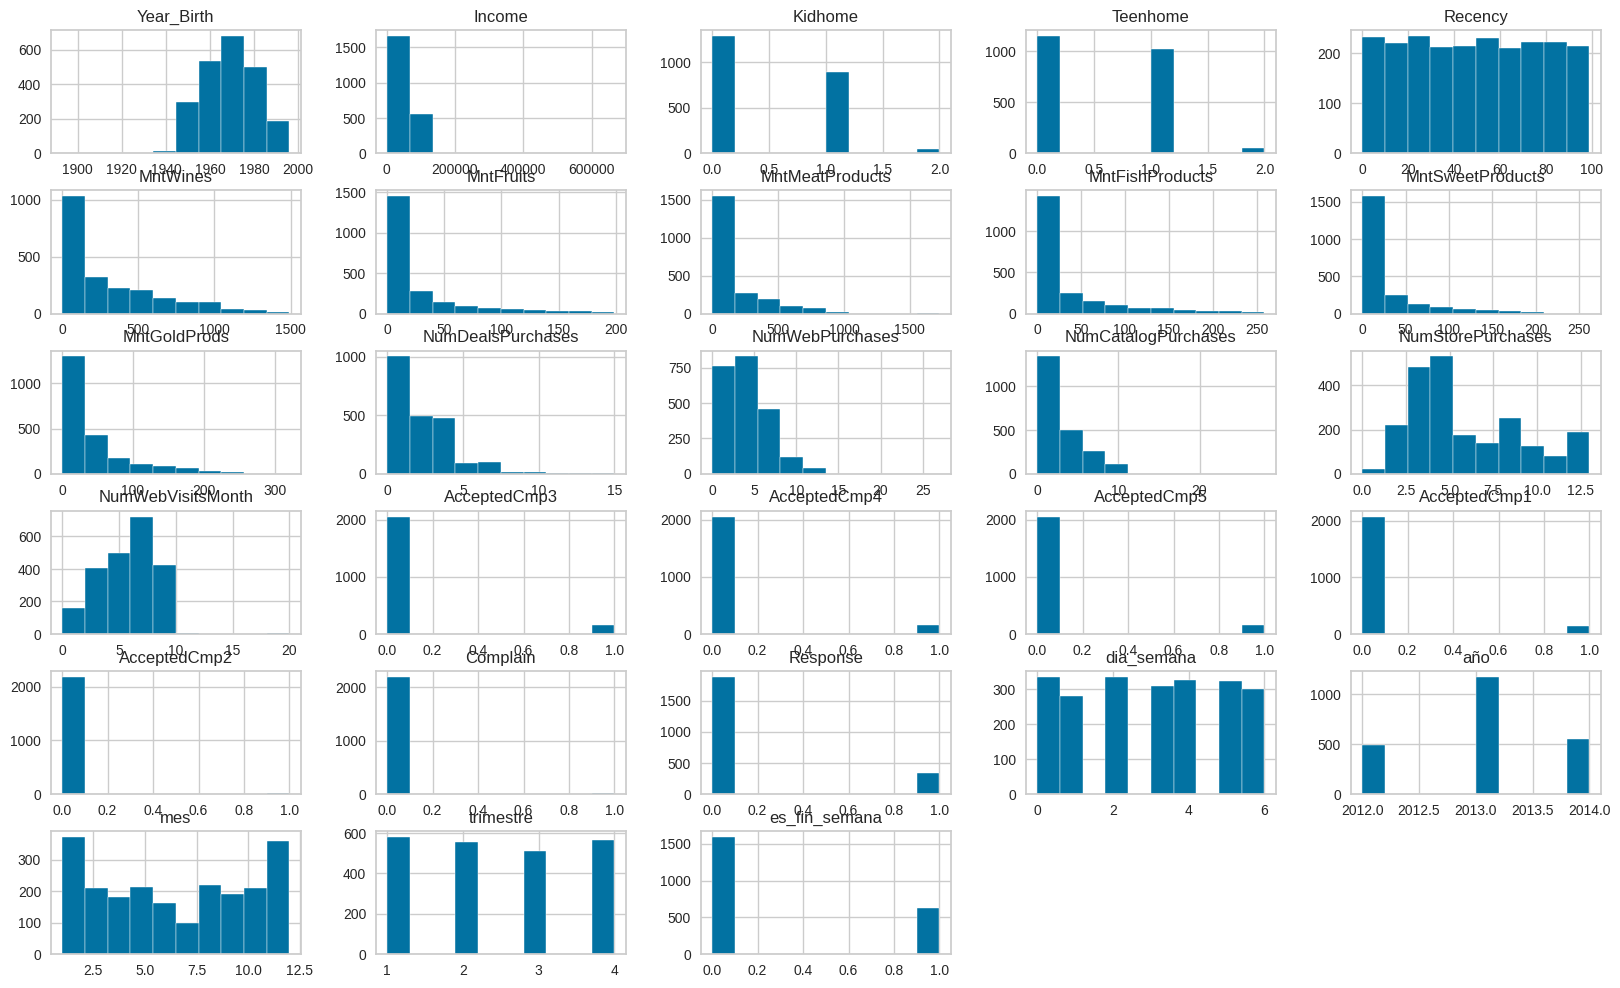

In [ ]:
#Histogramas de las variables:
fig = plt.figure(figsize = (20,12))
df1.hist(ax = fig.gca())

*Comentario Car:*
Las variables AcceptedCmp1, AcceptedCmp2... y así son si aceptó la compra en la primera vez, segunda y así.

Análisis del target

In [ ]:
from plotnine import ggplot, geom_histogram, aes

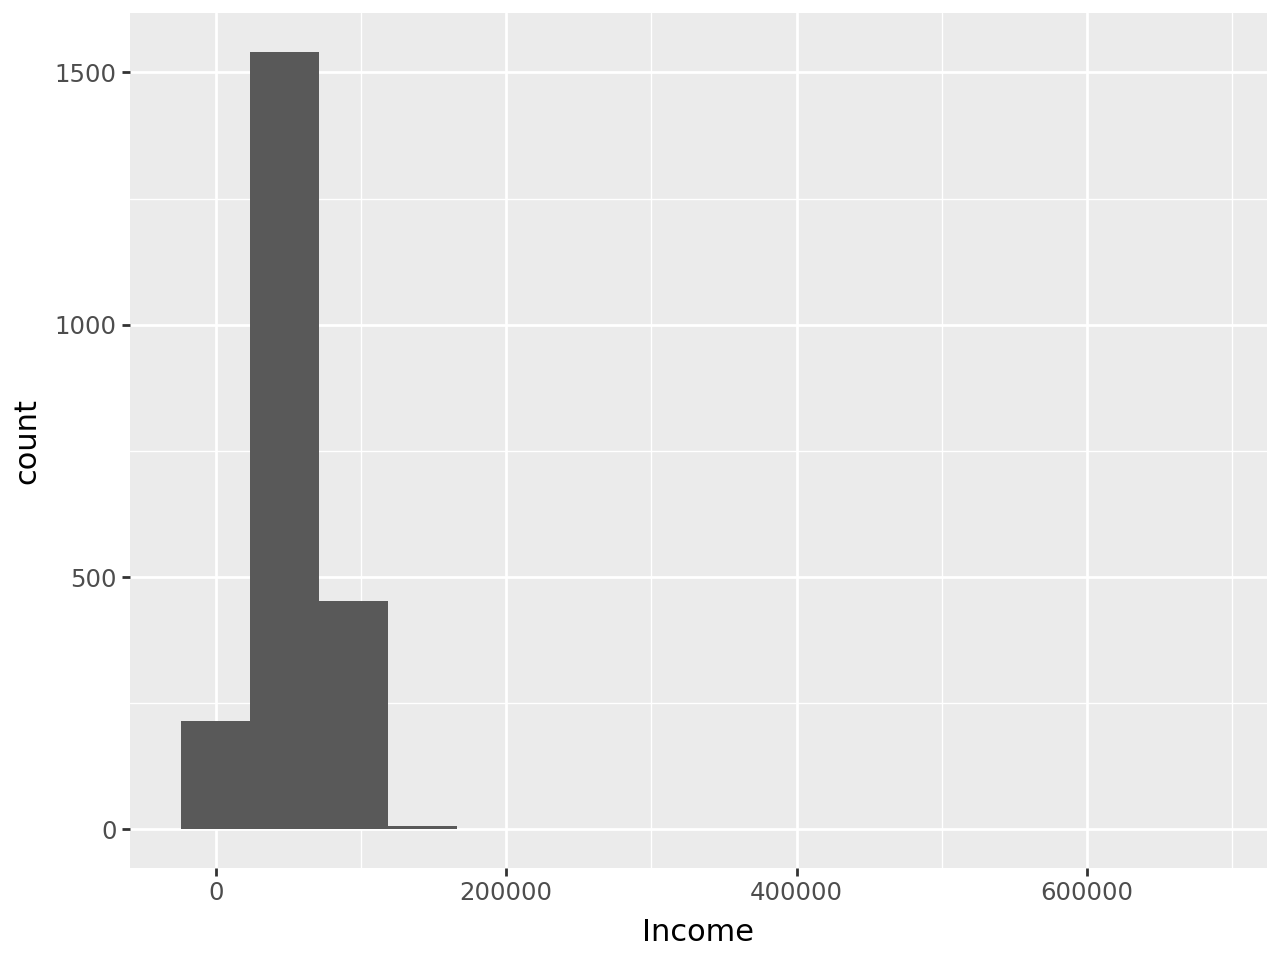

In [ ]:
(ggplot(df1)
 + aes(x='Income')
 + geom_histogram(bins=15)
)

In [ ]:
from funpymodeling.exploratory import profiling_num

profiling_num(df1['Income'])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,Income,52247.251354,25173.076661,0.481807,7579.2,18985.5,35303.0,51381.5,68522.0,84130.0,94458.8


In [ ]:
#Me fijo cuál es el valor máximo:
print(f'{df1['Income'].describe().max()}')

#Me fijo cuál es el valor mínimo:
print(f'{df1['Income'].describe().min()}')

#Total de datos en el data set:
df1.shape

666666.0
1730.0


(2216, 41)

In [ ]:
# Voy a filtrar esos outliers:
df2 = df1[df1['Income'] <= 94500]

In [ ]:
df2['Income'].describe()

,Income
count,2194.000000
mean,51327.718778
std,20416.902987
min,1730.000000
25%,35032.500000
50%,51117.500000
75%,67906.500000
max,94472.000000


In [ ]:
df2 = df2[df2['Income'] > 7500]

In [ ]:
df2['Income'].describe()

,Income
count,2171.000000
mean,51805.864579
std,19985.379562
min,8028.000000
25%,35694.500000
50%,51390.000000
75%,68122.000000
max,94472.000000


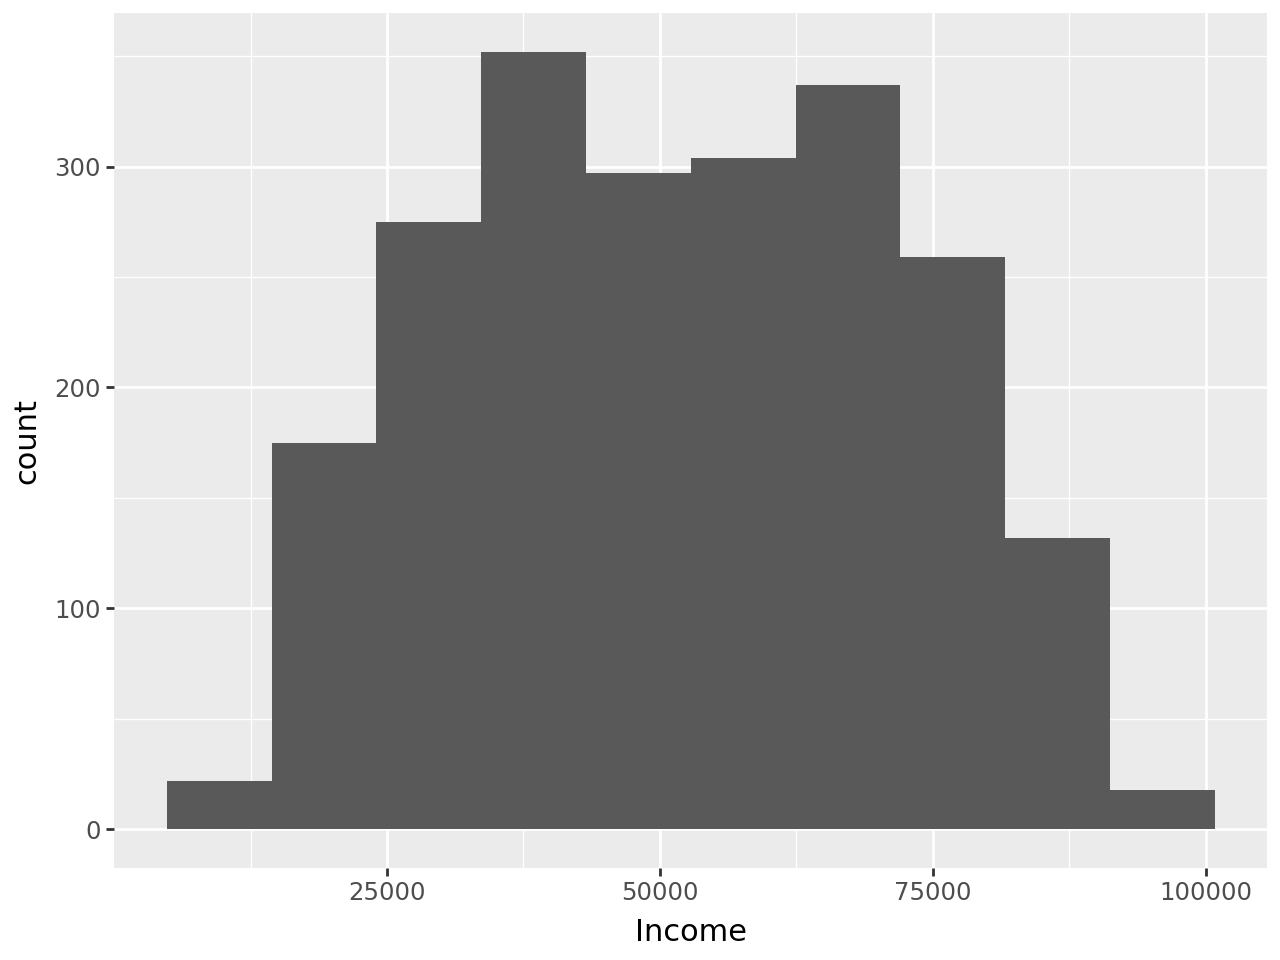

In [ ]:
(ggplot(df2)
 + aes(x='Income')
 + geom_histogram(bins=10)
)

#### 4.2) Separación TR/TS

In [ ]:
x_data_reg = df2.drop('Income', axis=1)
y_data_reg = df2['Income']

In [ ]:
# Obtenemos los valores del dataframe, para evitar el siguiente warning más adelante.
# <br>UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names.

#x_data_reg = x_data_reg.values
#y_data_reg = y_data_reg.values

⏰ acá también faltaba el randomstate

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data_reg, y_data_reg, random_state=99, test_size=0.3)

#### 4.3) Creación del modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

# a.Creamos modelo
model = LinearRegression()

# b. fiteamos
model.fit(x_train, y_train)

# c. obtenemos predicciónes para tr y ts
pred_tr=model.predict(x_train)
pred_ts=model.predict(x_test)

In [ ]:
pred_tr[0:5]

array([64714.04067877, 38926.66863095, 19873.02833937, 60288.35790361,
       19138.89032351])

Métricas de la regresión

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# --- Métricas para entrenamiento ---
r2_train = r2_score(y_train, pred_tr)
mae_train = mean_absolute_error(y_train, pred_tr)
mse_train = mean_squared_error(y_train, pred_tr)
rmse_train = np.sqrt(mse_train)

print("=== Métricas en Train ===")
print(f"R²:   {r2_train:.4f}")
print(f"MAE:  {mae_train:.2f}")
print(f"MSE:  {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")

# --- Métricas para test ---
r2_test = r2_score(y_test, pred_ts)
mae_test = mean_absolute_error(y_test, pred_ts)
mse_test = mean_squared_error(y_test, pred_ts)
rmse_test = np.sqrt(mse_test)

print("\n=== Métricas en Test ===")
print(f"R²:   {r2_test:.4f}")
print(f"MAE:  {mae_test:.2f}")
print(f"MSE:  {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")

=== Métricas en Train ===
R²:   0.8388
MAE:  6302.11
MSE:  63071600.93
RMSE: 7941.76

=== Métricas en Test ===
R²:   0.8437
MAE:  6377.80
MSE:  65223650.36
RMSE: 8076.12


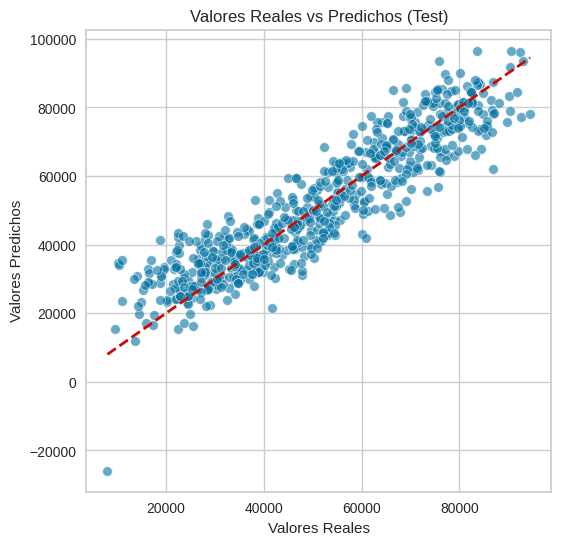

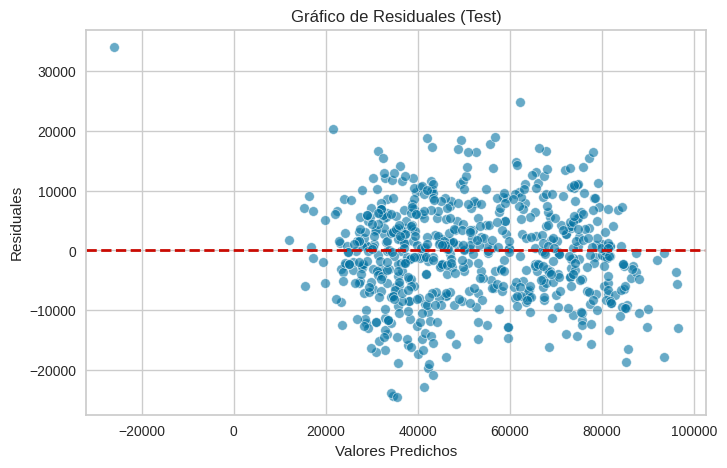

/usr/local/lib/python3.12/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


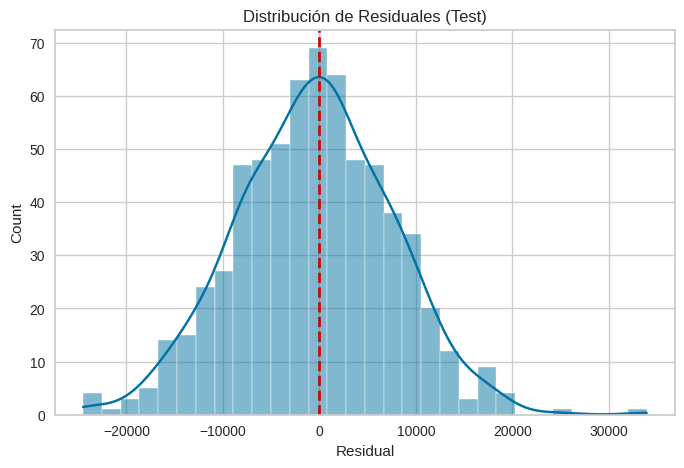

In [ ]:
# --- Gráfico 1: Reales vs. Predichos ---
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=pred_ts, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  # Línea identidad
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs Predichos (Test)")
plt.show()

# --- Gráfico 2: Residuales ---
residuales = y_test - pred_ts

plt.figure(figsize=(8,5))
sns.scatterplot(x=pred_ts, y=residuales, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Valores Predichos")
plt.ylabel("Residuales")
plt.title("Gráfico de Residuales (Test)")
plt.show()

# --- Gráfico 3: Distribución de Residuales ---
plt.figure(figsize=(8,5))
sns.histplot(residuales, bins=30, kde=True)
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.xlabel("Residual")
plt.title("Distribución de Residuales (Test)")
plt.show()

#### 4.4) Creación del RF con hypertuning (usando grid search)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

In [ ]:
params = {
    'n_estimators' : [10, 100, 300, 500,1000],
    'max_features': [50,100],
    #'bootstrap': [False, True],
    #'max_depth': [50, 500],
    #'min_samples_leaf': [3, 50],
    #'min_samples_split': [10, 50],
}

grid_rf = GridSearchCV(estimator = model_rf,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5,
                        verbose = 1
                        )

**NOTA**: Esta parte tarda, porque compara todos los modelos con los parámetros que le pasamos.

In [ ]:
grid_rf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [50, 100],
                         'n_estimators': [10, 100, 300, 500, 1000]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
#Acá me dice cuál fue el mejor de los modelos que corrimos antes.
grid_rf.best_estimator_

RandomForestRegressor(max_features=100, n_estimators=1000)

Predicción de casos nuevos:

In [ ]:
grid_rf.predict(x_train)
grid_rf.predict(x_test)

array([38822.317, 37327.504, 29008.189, 61801.508, 45890.55 , 55719.912,
       84501.369, 31071.816, 23857.847, 75316.07 , 35241.703, 41566.676,
       21202.647, 75941.327, 82112.418, 28621.714, 69772.95 , 49398.874,
       75244.622, 74019.721, 61473.517, 79220.397, 37370.396, 66581.255,
       72268.331, 44996.575, 38159.712, 35559.186, 46830.341, 70651.496,
       69513.406, 52391.18 , 67752.926, 76249.624, 41994.447, 40673.28 ,
       51086.328, 26712.398, 63775.576, 63956.621, 73440.224, 26622.198,
       41317.112, 77424.445, 44125.23 , 48221.892, 64130.775, 83578.964,
       50764.569, 27600.234, 36458.517, 32380.543, 41486.374, 72321.513,
       36996.979, 59874.741, 64787.583, 69821.003, 24211.668, 31951.874,
       33648.363, 29880.896, 73900.344, 81122.646, 64866.476, 35463.011,
       63728.941, 41473.363, 49846.139, 34902.688, 73262.991, 63587.298,
       71807.768, 73128.132, 44886.6  , 49992.069, 32524.763, 66790.45 ,
       27995.606, 34326.711, 80067.992, 74677.6  , 

In [ ]:
#Acá me dice cuáles son los mejores parámetros:
grid_rf.best_params_

{'max_features': 50, 'n_estimators': 1000}

#### 4.5) Análisis de las métricas de error

In [ ]:
pd.concat([pd.DataFrame(grid_rf.cv_results_["params"]),
           pd.DataFrame(grid_rf.cv_results_["mean_test_score"],
                        columns=["neg_mean_absolute_error"])],axis=1).sort_values('neg_mean_absolute_error', ascending=False)

,max_features,n_estimators,neg_mean_absolute_error
4,50,1000,-5303.002797
2,50,300,-5303.648260
9,100,1000,-5303.674635
3,50,500,-5304.259233
8,100,500,-5313.906495
7,100,300,-5323.202984
1,50,100,-5342.656403
6,100,100,-5361.719827
0,50,10,-5556.939328
5,100,10,-5738.185129


Análisis métrica TR vs TS:

In [ ]:
grid_rf.score(x_train, y_train)

-1897.9361342988807

In [ ]:
grid_rf.score(x_test, y_test)

-5380.061874233129

neg_mean_absolute_error = -5,380 significa:

MAE (Mean Absolute Error) = 5,380

El modelo se equivoca en promedio $5.380 al predecir el ingreso

#### 4.6) Gráfico de la curva del error

**Gráfico de prediction error**

- Linea gris: Lo que nos gustaría que fuera
- Linea negra: El ajuste de regresión, de la regresión misma

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


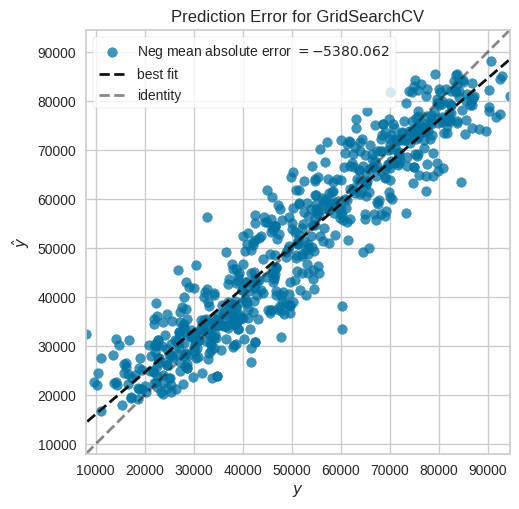

<Axes: title={'center': 'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

vis_pred_err = PredictionError(grid_rf)

vis_pred_err.fit(x_train, y_train)  # Fiteamos los datos al visualizador
vis_pred_err.score(x_test, y_test)  # Calculamos las métricas para test
vis_pred_err.show()                 # Visualizamos!

**Gráfico de residuos**

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


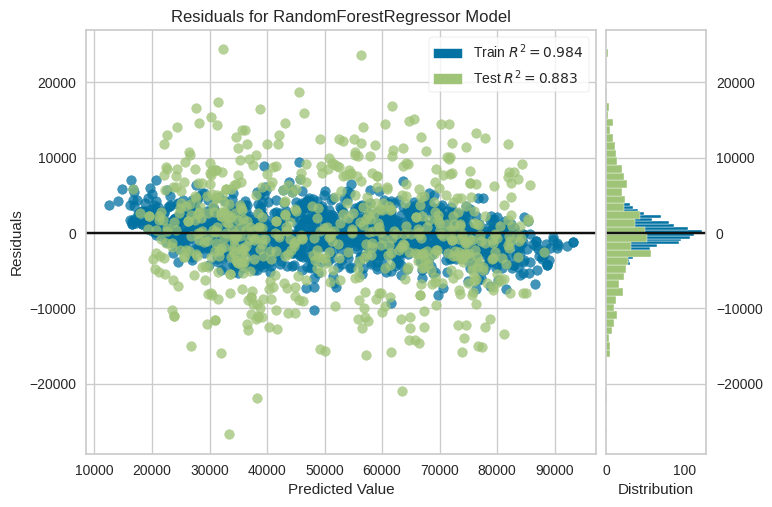

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot

# ojo: poner best_estimator_
vis_res = ResidualsPlot(grid_rf.best_estimator_)


# Copy-paste de la doc oficial:
vis_res.fit(x_train, y_train)  # Fiteamos los datos al visualizador
vis_res.score(x_test, y_test)  # Calculamos las métricas para test
vis_res.show()                 # Visualizamos!

## 5) Guardar un modelo

- Guardar ambos modelos de regresion en pkl `lr.pkl` y `rfr.pkl`

In [ ]:
import pickle

In [ ]:
# Guardar en el disco
filename = 'rfr.pkl'
pickle.dump(rf, open(filename, 'wb')) # rfr = nuestro modelo

In [ ]:
# Lo cargamos para usarlo en otro momento.
rf_loaded = pickle.load(open(filename, 'rb'))

###Resumen y conclusiones:

Analizando la tasa de conversión de la empresa observamos que posee
una tendencia negativa desde 09/2012.

1) Para mejorar el beneficio de la campaña de márketing realizamos
un modelo de Random Forest para predecir si el cliente contactado
comprará la oferta o no. Así la empresa podrá realizar acciones
solamente en los casos positivos.

Analizamos diferentes puntos de corte (0.5 - default, 0.15 - promedio y 0.26 - optimo por técnica de comparación de distintos puntos de corte - yellowbrick)

Con el punto de corte promedio (0.15) aumentan los falsos positivos, por lo tanto, aumentaría el costo de la acción. El punto 0.26 mantiene la captación de positivos y minimiza los falsos positivos, por ende es el óptimo.

Analizamos la cruva ROC y vemos que el modelo diferencia muy bien entre clases (AUC=0.87), sin embargo, pareciera que el modelo está sobre ajustado. Probamos ajustar hiperparámetros para mejorar esto.

2) Generamos una regresión lineal para predecir el ingreso.

Explica alrededor del 84% de la variabilidad de los datos.
Tiene un error promedio de ~6k unidades.
El modelo pierde precisión en casos extremos. Tiende a sub-estimar en los valores más altos y sobre-estimar en valores más bajos. Se predijeron 2 ingresos en negativos, por lo tanto hay que investigar porqué pasó y corregir.

3) Generamos un Random Forest con grid search también para predecir el ingreso.

El modelo entrenado con GridSearchCV predice bien, R2 de test es ~0.883,
con un error promedio de unas 5.3k, sin embargo, pierde precisión en casos extremos.
La diferencia entre train y test confirma que hay un poco de sobreajuste.

En conclusión vemos que el modelo de Random Forest tiene un rendimiento superior que el modelo de Regresión lineal.